<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/01Interpolacion_coefs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline,lagrange
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-2, 2, 11)
y = x**3+2*x**2+x+1
#perturbacion = np.random.normal(0, 1, len(x))  # Perturbación aleatoria
#y += perturbacion

In [3]:
lag = lagrange(x, y)
xi = 1.5
yi = lag(xi)
print(lag)
print(lag.c)

            10             9             8             7             6
-1.527e-16 x  - 1.443e-15 x + 4.247e-15 x + 4.441e-15 x - 2.021e-14 x
              5             4     3     2
 + 3.331e-14 x - 4.308e-14 x + 1 x + 2 x + 1 x + 1
[-1.52655666e-16 -1.44328993e-15  4.24660307e-15  4.44089210e-15
 -2.02060590e-14  3.33066907e-14 -4.30766534e-14  1.00000000e+00
  2.00000000e+00  1.00000000e+00  1.00000000e+00]


In [4]:
sc = CubicSpline(x, y)
xi = 1.5
yi = sc(xi)
print(sc.c.T)

[[ 1.    -4.     5.    -1.   ]
 [ 1.    -2.8    2.28   0.424]
 [ 1.    -1.6    0.52   0.952]
 [ 1.    -0.4   -0.28   0.968]
 [ 1.     0.8   -0.12   0.856]
 [ 1.     2.     1.     1.   ]
 [ 1.     3.2    3.08   1.784]
 [ 1.     4.4    6.12   3.592]
 [ 1.     5.6   10.12   6.808]
 [ 1.     6.8   15.08  11.816]]


In [5]:
# Coeficientes de los polinomios por intervalo
coefs = sc.c  # Matriz con [d_i, c_i, b_i, a_i] por intervalo

# Mostrar coeficientes
for i in range(len(x) - 1):
    if x[i]<=xi<=x[i+1]:
      print(f"Intervalo [{x[i]}, {x[i+1]}]:")
      #El coeficiente 𝑎 es el valor de 𝑦 en el nodo izquierdo del intervalo.
      #Los coeficientes 𝑏,𝑐,𝑑 se calculan para garantizar la suavidad en las derivadas y la continuidad en los intervalos.
      d = coefs[0, i]
      c = coefs[1, i]
      b = coefs[2, i]
      a = coefs[3, i]

      yii = a + b*(xi-x[i]) + c*(xi-x[i])**2 + d*(xi-x[i])**3
      print(f'y = {a:e} + {b:e}*(x-{x[i]}) + {c:e}*(x-{x[i]})**2 + {d:e}*(x-{x[i]})**3')
      print(f"xi = {xi},    yii = {yii} [{yi}]")

Intervalo [1.2000000000000002, 1.6]:
y = 6.808000e+00 + 1.012000e+01*(x-1.2000000000000002) + 5.600000e+00*(x-1.2000000000000002)**2 + 1.000000e+00*(x-1.2000000000000002)**3
xi = 1.5,    yii = 10.375 [10.375]


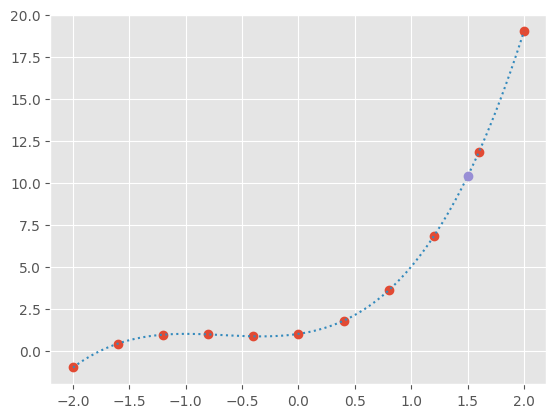

In [7]:
xs = np.linspace(x.min(),x.max(),100)
plt.style.use('ggplot')#('seaborn-v0_8-dark-palette')
plt.plot(x, y, 'o',xs, sc(xs), ':')
plt.plot(xi, yi, 'o')
#plt.grid()
plt.show()